In [1]:
import os
import scipy.sparse as sparse
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
import rasterstats
from shapely.geometry import Point, Polygon, LineString

import matplotlib.pyplot as plt
%matplotlib inline

# directory names
raster_dir = "raster"
shape_dir = "shape"


##### Visualización previa del geojson

<AxesSubplot:>

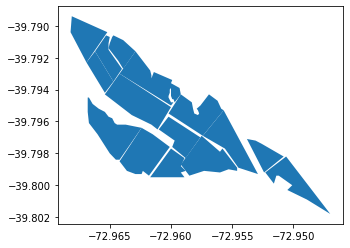

In [2]:
potreros = gpd.read_file(shape_dir+"/agrospace_piloto.geojson")
potreros.plot()

In [3]:
print(potreros.head())

   Sector   ID          Name          area  \
0     1.0  1.0  Punta estero  41369.504460   
1     1.0  2.0        Laurel  22633.602809   
2     1.0  3.0       Patagua  24631.063595   
3     1.0  4.0   Lado estero  22348.761392   
4     2.0  1.0        Maiz 2  80783.875155   

                                            geometry  
0  POLYGON ((-72.96810 -39.78940, -72.96520 -39.7...  
1  POLYGON ((-72.96540 -39.79420, -72.96690 -39.7...  
2  POLYGON ((-72.96470 -39.79350, -72.96620 -39.7...  
3  POLYGON ((-72.96480 -39.79070, -72.96470 -39.7...  
4  POLYGON ((-72.96540 -39.79430, -72.96420 -39.7...  


##### Procesamiento de datos

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


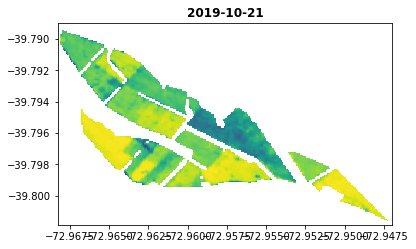

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


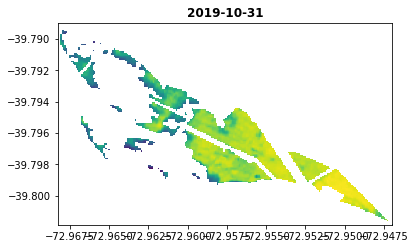

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


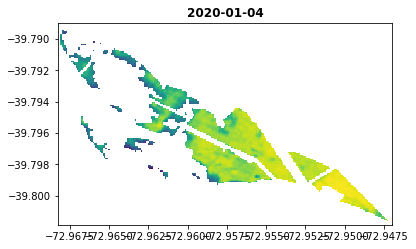

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


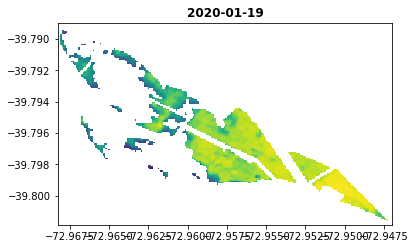

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


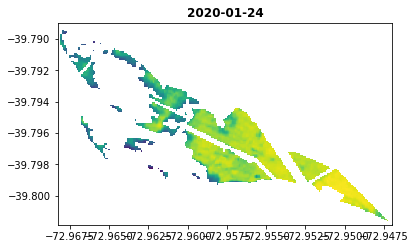

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


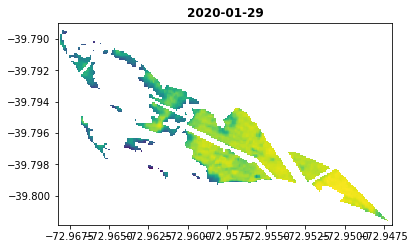

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


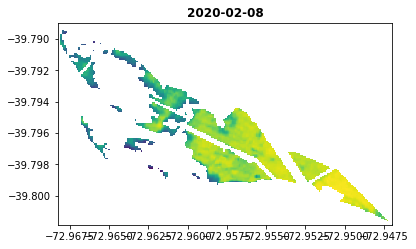

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


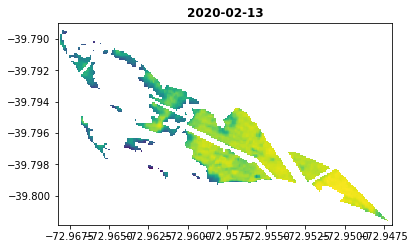

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


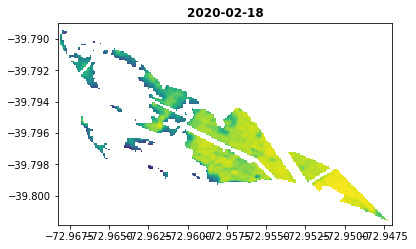

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


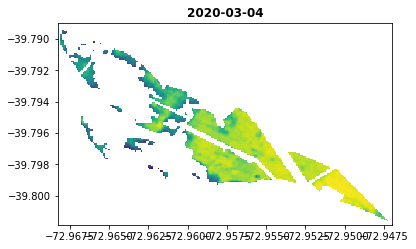

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


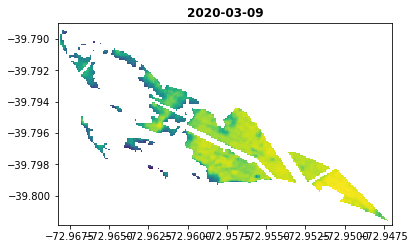

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


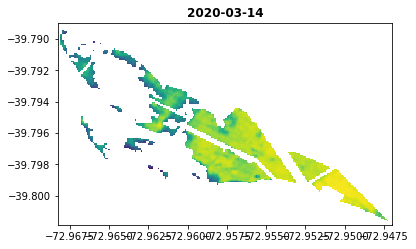

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


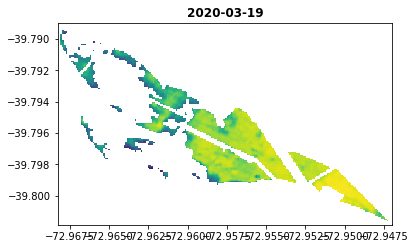

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


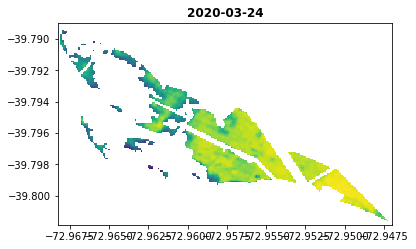

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


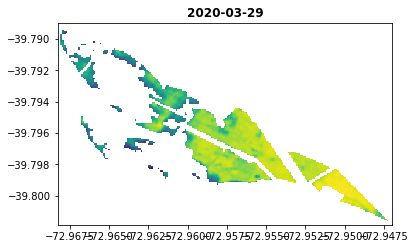

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


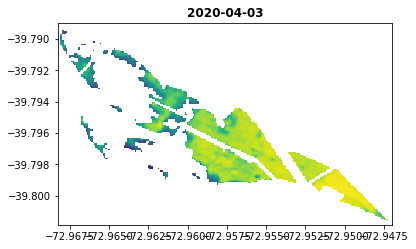

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


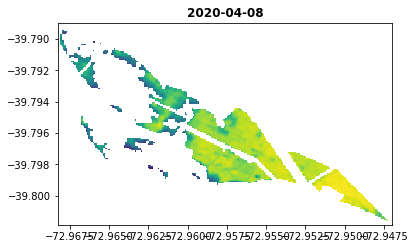

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


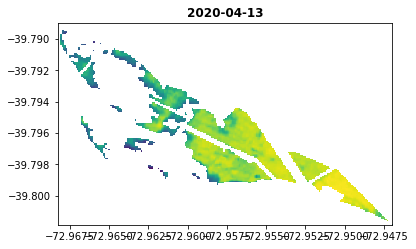

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


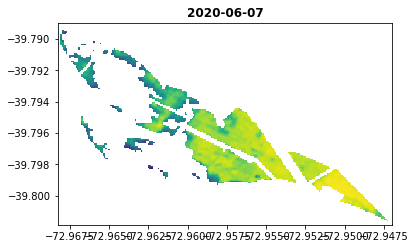

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


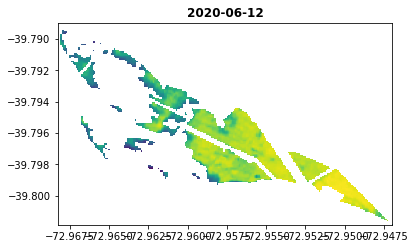

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


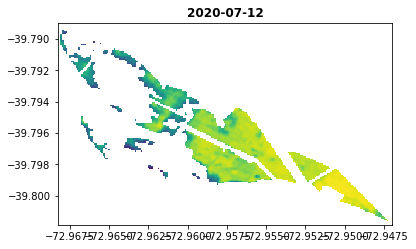

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


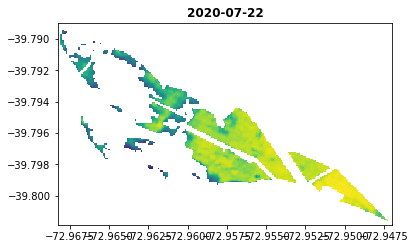

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


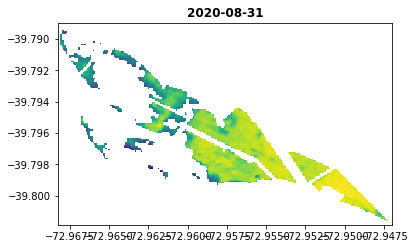

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


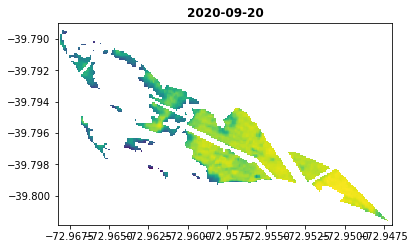

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


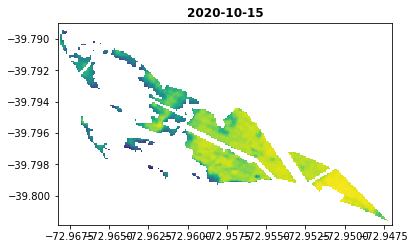

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


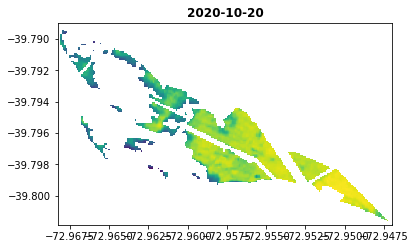

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


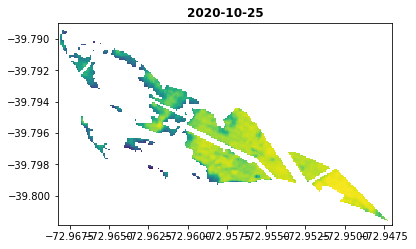

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


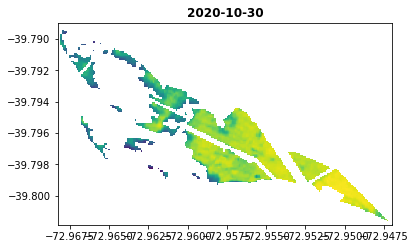

<Figure size 432x288 with 0 Axes>

c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\rasterstats\io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
c:\users\major\desktop\friki\estudios\git\otros\agrospace-intern-test\venv\lib\site-packages\matplotlib\image.py:490: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


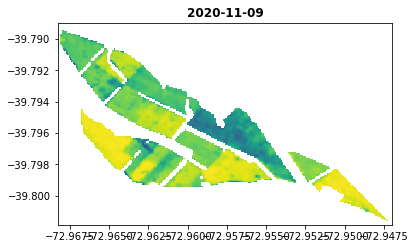

<Figure size 432x288 with 0 Axes>

In [4]:

# file names
raster_file_names = []
raster_file_dates = []

# data
#array_serial_data = []
#rasters_serial_data = pd.DataFrame()
#transformed_serial_data = []

# metrics
measured_data = []

for raster in os.listdir(raster_dir):
    # we ensure the files we're going to read have the extension .tif
    if (raster[-4:] == '.tif'):
        
        date = raster.replace('agrospace_piloto_', '')
        date = date.replace('.tif', '')
        
        #raster_file_names.append(raster)
        #raster_file_dates.append(date)
        
        # raster to np array
        m = rasterio.open(raster_dir+"/"+raster)
        # array_serial_data.append([raster, m.read(1)])
        # rasters_serial_data[name] = sparse.coo_matrix(m.read(1), shape = (m.shape[0], m.shape[1])).toarray().tolist()
        # transformed_serial_data.append([raster, m.transform])
        measured_data.append(rasterstats.zonal_stats(potreros, m.read(1), affine = m.transform, stats="count min mean max median", 
                                                     geojson_out = True))
        for i in range(len(measured_data[-1])):
            measured_data[-1][i]['date'] = date  # añadimos la fecha al diccionario
        
        # plotting
        fig, ax = plt.subplots(1, 1)
        show(rasterio.open(raster_dir+"/"+raster), title = date)
        potreros.plot(ax=ax, facecolor='None', edgecolor = 'red')
        plt.show()
        
        
        
        

In [5]:
avg_potreros = {}

for t in range(len(measured_data)):  # iterate over the time dictionaries
    for i in range(len(measured_data[t])):  # iterate over the potreros
        name = measured_data[t][i]['properties']['Name']
        if (name in avg_potreros.keys()):
            mean = measured_data[t][i]['properties']['Name']
        else:
            avg_potreros['Name'] = name

In [6]:
measured_data[0][0]['properties']

{'ID': 1.0,
 'Name': 'Punta estero',
 'Sector': 1.0,
 'area': 41369.504460029304,
 'min': 0.17624999582767487,
 'max': 0.7881987690925598,
 'mean': 0.6413577264933674,
 'count': 540,
 'median': 0.6605344712734222}